一、采用逻辑回归方法训练贷款逾期模型(主要是方法论),特别注意，测试数据是人工胡乱造的，所以处理的预测准确率较低

In [41]:
#导入数值计算库
import numpy as np
#导入科学计算库
import pandas as pd
#导入交叉验证库
from sklearn import cross_validation
from sklearn import linear_model

from matplotlib import pyplot as plt
#导入GaussianNB库
from sklearn.naive_bayes import GaussianNB


In [42]:
#读取历史贷款状态数据并创建loan_data数据表，这里用的是execl表，也可以用 mysql 等关系数据库 
#创建mysql数据的连接
#db = pymysql.connect("localhost", "root", "gaishi123", "sales_data", use_unicode=True, charset="utf8")

loan_data=pd.DataFrame(pd.read_excel('jenyouhu.xlsx',encoding='GBK'))
#处理缺失值
#loan_data = loan_data.dropna()
#查看数据规模
loan_data.shape

(20, 11)

In [43]:
#查看数据表内容 

#col_name = loan_data.columns.tolist()
#col_name.insert(0,'违约概率')# 在 ’违约记录' 列前面插入
#loan_data=loan_data.reindex(columns=col_name)
loan_data.head

<bound method NDFrame.head of     status  历史违约次数  借贷时间   银行存款 工作状态 房贷情况  年龄 个人财产 电话号码 户口所在地 购买金融产品类型
0        1       0    30   1000    无    无  25    无   手机    江西       保险
1        1       0    30   2000    无    无  23    无   手机    江西       保险
2        1       0    30   3000    无    无  35    无   手机    江西       保险
3        1       0    60   4000    有    无  27    无   手机    江西       保险
4        1       0    60   5000    有    无  28    无   手机    江西       保险
5        1       0    60   6000    无    无  30    无   手机    江西       保险
6        0       0    60   7000    无    无  31    无   手机    江西       保险
7        1       0    60   8000    无    无  32    无   手机    江西       证券
8        0       1    90   9000    有    无  33    无   手机    江西       证券
9        0       1    90  10000    无    无  35    无   手机    江西       证券
10       0       1    90  11000    无    无  35    有   手机    江西       证券
11       0       1    90  12000    无    无  35    有   手机    江西       证券
12       1       1    90  13000    有    有  35  

In [44]:
#数据预处理，逻辑回归要求输入的数据是数值型的数据，因此我们要对离散数据进行虚拟数据的生成；
##对类别Category进行编码(转化为数值)
dummyColumns = ['工作状态','房贷情况','个人财产','电话号码','户口所在地','购买金融产品类型']

for column in dummyColumns:
    loan_data[column]=loan_data[column].astype('category') 
    
#work_mapping = { '有': 1,'无': 0}  
#hous_mapping = { '有': 1,'无': 0}  
#pesn_mapping = { '无房无车':0, '有车':1, '有房':2, '有车有房':3 }
#pone_mapping = { '手机':0, '座机':1 }
#prod_mapping = { '无':0,'保险':1,'证券':2 }
#loan_data['工作状态'] = loan_data['工作状态'].map(work_mapping) 
#loan_data['房贷情况'] = loan_data['房贷情况'].map(hous_mapping) 
#loan_data['个人财产'] = loan_data['个人财产'].map(pesn_mapping) 
#loan_data['电话号码'] = loan_data['电话号码'].map(pone_mapping) 
#loan_data['购买金融产品类型'] = loan_data['购买金融产品类型'].map(prod_mapping) 

dummiesData = pd.get_dummies( loan_data, columns=dummyColumns, prefix=dummyColumns, prefix_sep="_")


,status,历史违约次数,借贷时间,银行存款,年龄,工作状态_无,工作状态_有,房贷情况_无,房贷情况_有,个人财产_无,个人财产_有,电话号码_座机,电话号码_手机,户口所在地_江西,户口所在地_深圳,购买金融产品类型_保险,购买金融产品类型_证券
status,1.000000,-0.283315,-0.210819,-0.230098,-0.218868,0.042796,-0.042796,-0.041667,0.041667,0.204124,-0.204124,0.041667,-0.041667,0.042796,-0.042796,0.385164,-0.385164
历史违约次数,-0.283315,1.000000,0.970582,0.937735,0.795938,-0.163684,0.163684,-0.873556,0.873556,-0.867472,0.867472,0.873556,-0.873556,-0.891171,0.891171,-0.806298,0.806298
借贷时间,-0.210819,0.970582,1.000000,0.940325,0.785124,-0.189466,0.189466,-0.895979,0.895979,-0.826236,0.826236,0.895979,-0.895979,-0.947331,0.947331,-0.730798,0.730798
银行存款,-0.230098,0.937735,0.940325,1.000000,0.886885,-0.045449,0.045449,-0.849591,0.849591,-0.867110,0.867110,0.849591,-0.849591,-0.827170,0.827170,-0.827170,0.827170
年龄,-0.218868,0.795938,0.785124,0.886885,1.000000,0.141378,-0.141378,-0.697641,0.697641,-0.712027,0.712027,0.697641,-0.697641,-0.701622,0.701622,-0.703379,0.703379
工作状态_无,0.042796,-0.163684,-0.189466,-0.045449,0.141378,1.000000,-1.000000,0.256776,-0.256776,0.104828,-0.104828,-0.256776,0.256776,0.120879,-0.120879,0.098901,-0.098901
工作状态_有,-0.042796,0.163684,0.189466,0.045449,-0.141378,-1.000000,1.000000,-0.256776,0.256776,-0.104828,0.104828,0.256776,-0.256776,-0.120879,0.120879,-0.098901,0.098901
房贷情况_无,-0.041667,-0.873556,-0.895979,-0.849591,-0.697641,0.256776,-0.256776,1.000000,-1.000000,0.816497,-0.816497,-1.000000,1.000000,0.898717,-0.898717,0.599145,-0.599145
房贷情况_有,0.041667,0.873556,0.895979,0.849591,0.697641,-0.256776,0.256776,-1.000000,1.000000,-0.816497,0.816497,1.000000,-1.000000,-0.898717,0.898717,-0.599145,0.599145
个人财产_无,0.204124,-0.867472,-0.826236,-0.867110,-0.712027,0.104828,-0.104828,0.816497,-0.816497,1.000000,-1.000000,-0.816497,0.816497,0.733799,-0.733799,0.733799,-0.733799


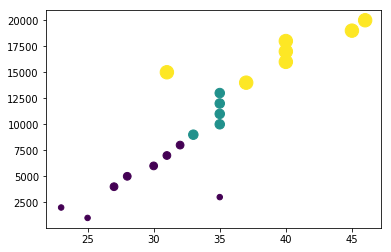

In [47]:
#选择变量，绘制散点图 (只是举例而已)
plt.scatter(dummiesData.年龄,dummiesData.银行存款,dummiesData.借贷时间,dummiesData.历史违约次数)
dummiesData.corr()

In [49]:
#数据挖掘对数据和业务知识的理解是非常重要的；
#挑选特征列也是建模中最耗费精力的事情，特征变量需要一一比较，才能选择出来

dummiesSelectx = ['历史违约次数','借贷时间','银行存款','年龄']
dummiesSelecty = ['status']

inputData  = dummiesData[dummiesSelectx]
outputData = dummiesData[dummiesSelecty]

In [50]:
#建模求解回归方程

lrModel = linear_model.LogisticRegression()

In [51]:
# 模型训练
lrModel.fit(inputData,outputData)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
#模型评估
lrModel.score(inputData,outputData)

0.4

In [53]:
#利用回归模型进行预测
lrModel.predict(inputData)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0])